<a href="https://colab.research.google.com/github/Kyoyakp/ETG-AI-ML-Internship/blob/main/Data%20Analysis/Olympics_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Getting Data for Analysis

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
! git clone https://github.com/Kyoyakp/ETG-AI-ML-Internship

Cloning into 'ETG-AI-ML-Internship'...
remote: Enumerating objects: 87, done.
remote: Counting objects: 100% (87/87), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 87 (delta 31), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (87/87), done.


In [14]:
df = pd.read_csv('/content/ETG-AI-ML-Internship/Data Analysis/Olympics_Data.csv')
df.shape
df.head()


,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


### 1. In how many cities Summer Olympics is held so far?

In [15]:
len(df['City'].unique())

22

### 2. Which sport is having most number of Gold Medals so far? (Top 5)

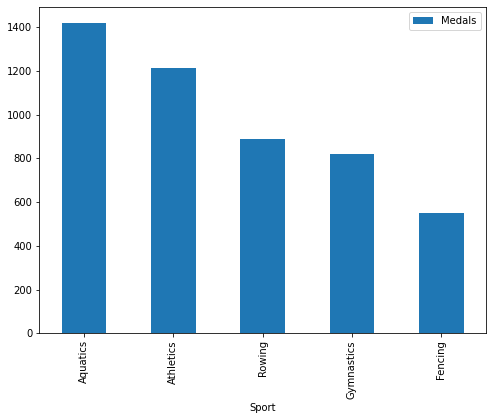

In [16]:
# Creating Data containing only Gold medal info
gold = df[df['Medal']=='Gold']


# Creating list of sports and no. of gold medals won in it
data = []
for Sport in gold['Sport'].unique():
    data.append([Sport , len(gold[gold['Sport']  == Sport])])


# coverting list into DATAFRAME
data = pd.DataFrame(data,columns = ['Sport','Medals'])


# sorting the DATA
data = data.sort_values(by='Medals', ascending=False).head()


# Ploting graph of the DATA
data.plot(x = 'Sport', y = 'Medals', kind = 'bar', figsize = (8,6))

### 3. Which sport is having most number of medals so far? (Top 5)

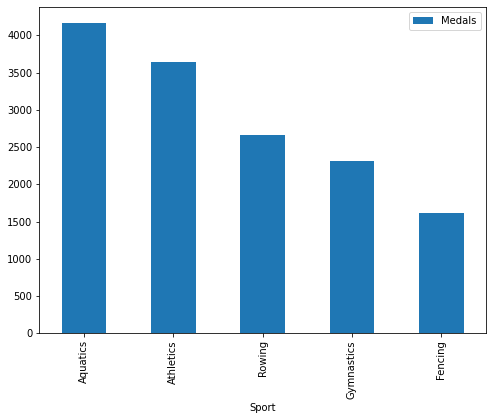

In [17]:
data = []
for Sport in df['Sport'].unique():
    data.append([Sport , len(df[df['Sport']  == Sport])])


# ALL the function performed below can also be peerformed in one line 
# without using "data" for storing info


# coverting list into DATAFRAME
data = pd.DataFrame(data,columns = ['Sport','Medals'])

# sorting the DATA
data = data.sort_values(by='Medals', ascending=False).head()

# Ploting graph of the DATA
data.plot(x = 'Sport', y = 'Medals', kind = 'bar', figsize = (8,6))
plt.show()

### 4. Which player has won most number of medals? (Top 5)

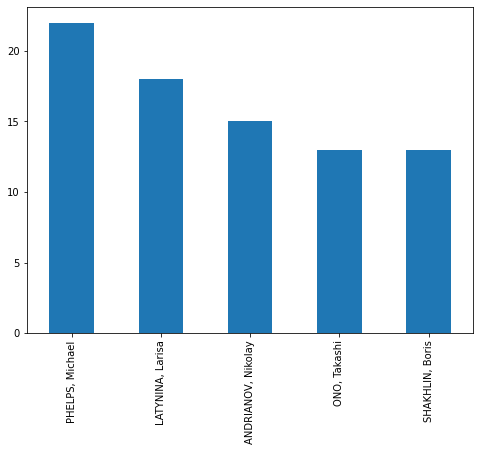

In [18]:
data = df['Athlete'].value_counts()[:5]

data.plot(kind = 'bar', figsize = (8,6))

'RUNTIME' is High using below method

In [20]:
'''
data = []
for Athlete in df['Athlete'].unique():
    data.append([Athlete , len(df[df['Athlete']  == Athlete])])

# coverting list into DATAFRAME
data = pd.DataFrame(data,columns = ['Athlete','Medals'])

# sorting the DATA
data = data.sort_values(by='Medals', ascending=False).head()

# Ploting graph of the DATA
data.plot(x = 'Athlete', y = 'Medals', kind = 'bar', figsize = (8,6))

'''

"\ndata = []\nfor Athlete in df['Athlete'].unique():\n    data.append([Athlete , len(df[df['Athlete']  == Athlete])])\n\n# coverting list into DATAFRAME\ndata = pd.DataFrame(data,columns = ['Athlete','Medals'])\n\n# sorting the DATA\ndata = data.sort_values(by='Medals', ascending=False).head()\n\n# Ploting graph of the DATA\ndata.plot(x = 'Athlete', y = 'Medals', kind = 'bar', figsize = (8,6))\n\n"

### 5. Which player has won most number Gold Medals of medals? (Top 5)

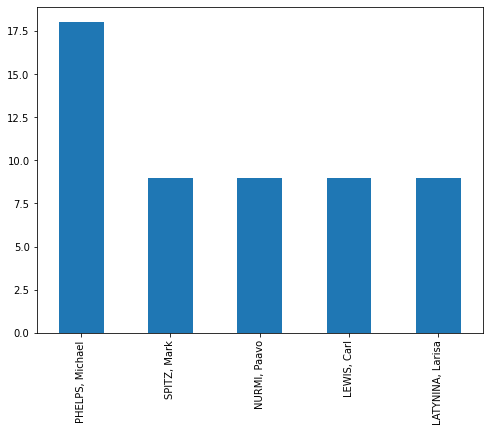

In [21]:
gold = df[df['Medal']=='Gold']

data = gold['Athlete'].value_counts()[:5]

data.plot(kind ="bar", figsize = (8,6))

'RUNTIME' is High using below method

In [22]:
'''
gold = df[df['Medal']=='Gold']
data = []
for Athlete in gold['Athlete'].unique():
    data.append([Athlete , len(gold[gold['Athlete']  == Athlete])])

# coverting list into DATAFRAME
data = pd.DataFrame(data,columns = ['Athlete','Medals'])

# sorting the DATA
data = data.sort_values(by='Medals', ascending=False).head()

# Ploting graph of the DATA
data.plot(x = 'Athlete', y = 'Medals', kind = 'bar', figsize = (8,6))
'''

"\ngold = df[df['Medal']=='Gold']\ndata = []\nfor Athlete in gold['Athlete'].unique():\n    data.append([Athlete , len(gold[gold['Athlete']  == Athlete])])\n\n# coverting list into DATAFRAME\ndata = pd.DataFrame(data,columns = ['Athlete','Medals'])\n\n# sorting the DATA\ndata = data.sort_values(by='Medals', ascending=False).head()\n\n# Ploting graph of the DATA\ndata.plot(x = 'Athlete', y = 'Medals', kind = 'bar', figsize = (8,6))\n"

### 6. In which year India won first Gold Medal in Summer Olympics?
#### From graph below it can be seen
INDIA won 1st GOLD in "1928" and The no. of medals were "15"

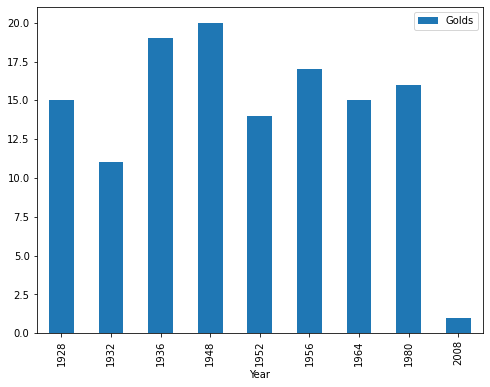

In [23]:
IND = df[df['Country']=='IND']
IND_Gold = IND[IND['Medal'] == 'Gold']
data = []
for Year in IND_Gold['Year'].unique():
  data.append([Year, len(IND_Gold[IND_Gold['Year']==Year])])
pd.DataFrame(data, columns = ['Year','Golds']).sort_values(by="Year").plot(x = "Year", y = "Golds", kind = 'bar', figsize = (8,6))


### 7. Which event is most popular in terms on number of players? (Top 5)

Method_1 (long)
______________________



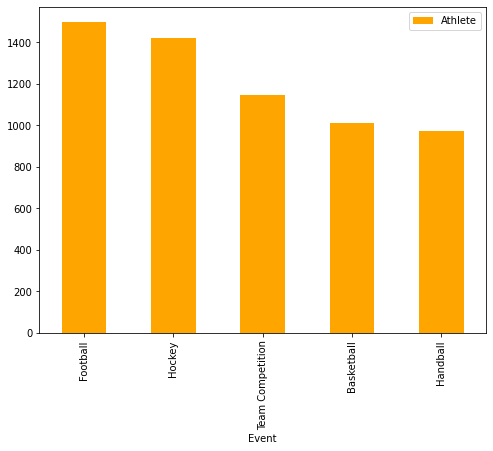

In [24]:
data = []
for i in df['Event'].unique():
  data.append([i, len(df[df['Event']==i])])

data = pd.DataFrame(data,columns = ["Event", "Athlete"])

data = data.sort_values(by = "Athlete", ascending = False).head()

data.plot(x='Event', y ="Athlete", kind = 'bar', figsize = (8,6), color = "Orange")

Method_2 - (Using "groupby()" function)

________________________________________

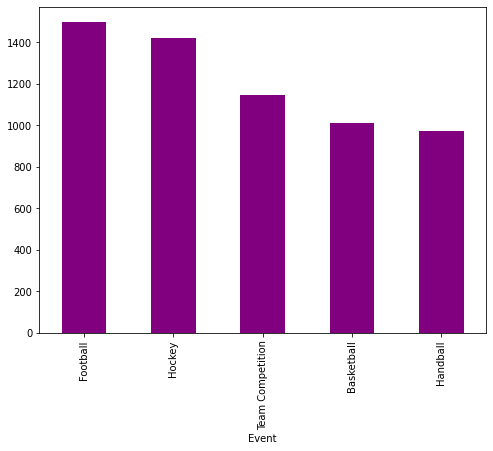

In [25]:
df.groupby("Event").count()["Athlete"].sort_values(ascending = False).head().plot.bar(figsize = (8,6), color = "purple")


### 8. Which sport is having most female Gold Medalists? (Top 5)

Using some matplotlib methods

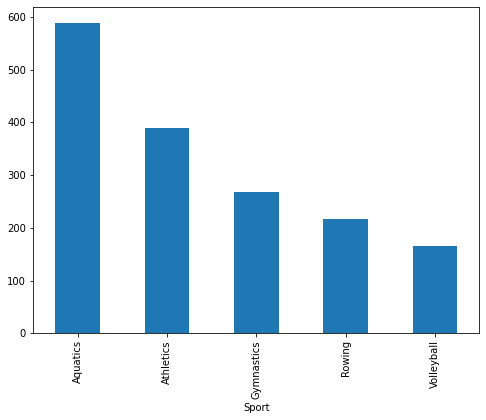

In [26]:
gold = df[df['Medal']=='Gold']
fem = gold[gold['Gender']=='Women']
plt.figure(figsize = (8,6))
fem.groupby("Sport").count()["Gender"].sort_values(ascending=False).head().plot.bar()
plt.show()